Tensors make it very convenient to feed in sets of images into our model - (I, H, W, C)
* I - Images
* H - Height of image in pixels
* W - Width of image in pixels
* C - Color channels: 1 for grayscale, 3 for RGB

In [10]:
from keras.datasets import mnist

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
import matplotlib.pyplot as plt

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
single_image = x_train[0]

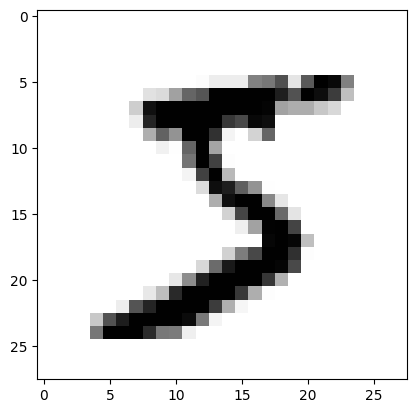

In [15]:
plt.imshow(single_image, cmap='gray_r')

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
from keras.utils.np_utils import to_categorical

In [18]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [19]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Labels have now been one-hot encoded

Now, we will normalize the image as well

In [20]:
x_train = x_train/x_train.max()

In [21]:
x_test = x_test/x_test.max()

In [22]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [23]:
x_train.max()

1.0

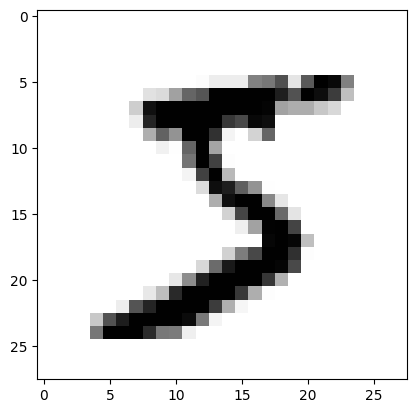

In [24]:
plt.imshow(x_train[0], cmap='gray_r')

Now, we will reshape the data

In [25]:
x_train = x_train.reshape(60000,28, 28, 1)

In [26]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test = x_test.reshape(10000,28, 28, 1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

Now, it is time to build the model

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [30]:
model = Sequential()

#Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (28, 28, 1), activation='relu'))

#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Flatten layer
model.add(Flatten())

#Dense layer
model.add(Dense(128, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [32]:
model.fit(x_train, y_cat_train, epochs=2)

Epoch 1/2


1875/1875 [==============================] - 17s 9ms/step - loss: 0.1391 - accuracy: 0.9571
Epoch 2/2
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0481 - accuracy: 0.9856


In [33]:
model.metrics_names

['loss', 'accuracy']

In [34]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9865


[0.03992878273129463, 0.9865000247955322]

In [35]:
from sklearn.metrics import classification_report

In [36]:
import numpy as np

In [37]:
pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [38]:
pred[0]

7

In [39]:
y_test[0]

7

In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# CIFAR-10

In [41]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [42]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [43]:
x_train.shape

(50000, 32, 32, 3)

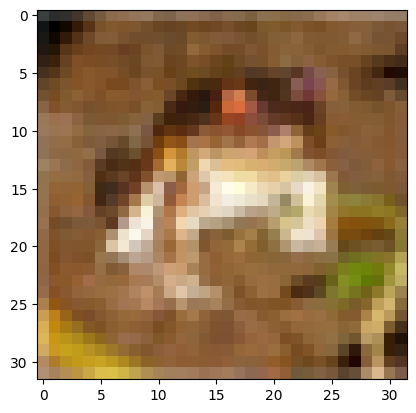

In [44]:
plt.imshow(x_train[0])

In [45]:
x_train.max()

255

In [46]:
x_train = x_train/255
x_test = x_test/255

In [47]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (32, 32, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape = (32, 32, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [51]:
model.fit(x_train, y_cat_train, verbose=1, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5852 - accuracy: 0.4318
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.2255 - accuracy: 0.5685
Epoch 3/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0700 - accuracy: 0.6272
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9667 - accuracy: 0.6669
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8851 - accuracy: 0.6945
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8213 - accuracy: 0.7206
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7664 - accuracy: 0.7375
Epoch 8/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7277 - accuracy: 0.7544
Epoch 9/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6852 - accuracy: 0.7697
Epoch 10/10
1563/1563 [==============================] - 22s 14m

In [52]:
model.metrics_names

['loss', 'accuracy']

In [53]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1799 - accuracy: 0.6461


[1.179851770401001, 0.6460999846458435]

In [54]:
pred = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 1s 4ms/step


In [55]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.58      0.67      1000
           1       0.78      0.80      0.79      1000
           2       0.65      0.42      0.51      1000
           3       0.43      0.54      0.48      1000
           4       0.58      0.62      0.60      1000
           5       0.45      0.69      0.54      1000
           6       0.68      0.77      0.72      1000
           7       0.72      0.69      0.70      1000
           8       0.85      0.65      0.73      1000
           9       0.80      0.71      0.75      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000

